In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-gf06dnzt
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-gf06dnzt
  Resolved https://github.com/facebookresearch/detectron2.git to commit eddac5d5b4fce9b5eba5518f9ee348fa3a531407
  Preparing metadata (setup.py) ... done


In [ ]:
import torch, torchvision
print(torch.cuda.is_available())
import os, pickle ,random
import cv2 as cv
import matplotlib.pyplot as plt

True


In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode

In [ ]:
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
output_dir = "./instance_segmentation"
num_classes = 1
device = "cuda"

In [ ]:
train_dataset_name = "train_data"
train_images_path = "/content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/train"
train_json_annot_path = "/content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/train/train.json"
val_dataset_name = "val_data"
val_images_path = "/content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/val"
val_json_annot_path = "/content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/val/val.json"

In [ ]:
register_coco_instances(name = train_dataset_name, metadata = {},
                       json_file = train_json_annot_path,
                        image_root = train_images_path)

In [ ]:
register_coco_instances(name = val_dataset_name, metadata = {},
                       json_file = val_json_annot_path,
                        image_root = val_images_path)

In [ ]:
cfg_save_path = "IS_cfg.pickle"

In [ ]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)

    for s in random.sample(dataset_custom, n):
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (5,10))
        plt.imshow(v.get_image())
        plt.show()

[06/27 14:01:22 d2.data.datasets.coco]: Loading /content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/train/train.json takes 1.85 seconds.
[06/27 14:01:22 d2.data.datasets.coco]: Loaded 156 images in COCO format from /content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/train/train.json


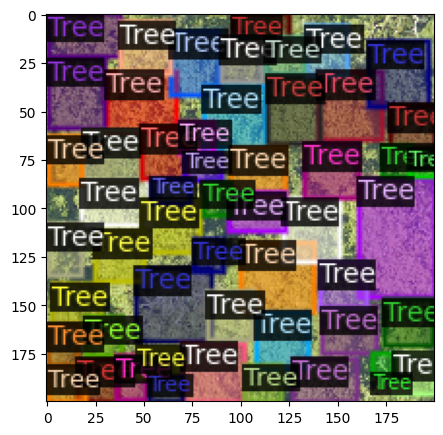

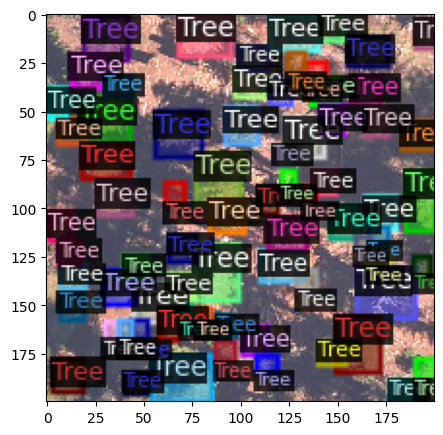

In [ ]:
#Verifying
plot_samples(dataset_name = train_dataset_name, n = 2)

In [ ]:
def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir):
    cfg = get_cfg()

    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
    cfg.DATASETS.TRAIN = (train_dataset_name,)
    cfg.DATASETS.TEST = (val_dataset_name,)

    cfg.DATALOADER.NUM_WORKERS = 2

    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []

    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.DEVICE = device
    cfg.OUTPUT_DIR = output_dir

    return cfg

In [ ]:
def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir)

    with open(cfg_save_path,"wb") as f:
        pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)

    os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)

    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume = False)

    trainer.train()

In [ ]:
main()

[06/27 14:01:31 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 162MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[06/27 14:01:32 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/27 14:01:58 d2.utils.events]:  eta: 0:09:34  iter: 19  total_loss: 4.628  loss_cls: 0.6975  loss_box_reg: 0.3157  loss_mask: 0.6904  loss_rpn_cls: 2.695  loss_rpn_loc: 0.1899    time: 0.6244  last_time: 0.6676  data_time: 0.2186  last_data_time: 0.2698   lr: 4.9953e-06  max_mem: 2095M
[06/27 14:02:16 d2.utils.events]:  eta: 0:09:38  iter: 39  total_loss: 3.198  loss_cls: 0.635  loss_box_reg: 0.4115  loss_mask: 0.6835  loss_rpn_cls: 1.312  loss_rpn_loc: 0.1521    time: 0.6882  last_time: 0.6893  data_time: 0.1981  last_data_time: 0.3061   lr: 9.9902e-06  max_mem: 2095M
[06/27 14:02:29 d2.utils.events]:  eta: 0:09:22  iter: 59  total_loss: 2.292  loss_cls: 0.5747  loss_box_reg: 0.4942  loss_mask: 0.6711  loss_rpn_cls: 0.3432  loss_rpn_loc: 0.1402    time: 0.6866  last_time: 0.7551  data_time: 0.2440  last_data_time: 0.2561   lr: 1.4985e-05  max_mem: 2095M
[06/27 14:02:41 d2.utils.events]:  eta: 0:09:09  iter: 79  total_loss: 2.137  loss_cls: 0.5099  loss_box_reg: 0.4967  loss_mask: 0

In [ ]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

[06/27 14:10:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./instance_segmentation/model_final.pth ...


In [ ]:
def on_image(image_path,predictor):
    im = cv.imread(image_path)
    outputs = predictor(im)
    v = Visualizer(im[:,:,::-1], metadata = {}, scale = 0.5, instance_mode = ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize = (5,10))
    plt.imshow(v.get_image())

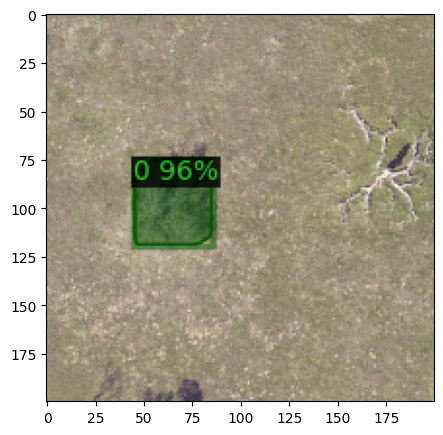

In [ ]:
image_path = "/content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/val/2018_SJER_3_252000_4106000_image_234.tif"
on_image(image_path, predictor)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("val_data", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "val_data")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[06/27 14:10:29 d2.data.datasets.coco]: Loaded 38 images in COCO format from /content/drive/MyDrive/NEON TreeEvaluation Benchmark part dataset/val/val.json
[06/27 14:10:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/27 14:10:29 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/27 14:10:29 d2.data.common]: Serializing 38 elements to byte tensors and concatenating them all ...
[06/27 14:10:29 d2.data.common]: Serialized dataset takes 0.10 MiB
[06/27 14:10:29 d2.evaluation.evaluator]: Start inference on 38 batches
[06/27 14:10:32 d2.evaluation.evaluator]: Inference done 11/38. Dataloading: 0.0998 s/iter. Inference: 0.0848 s/iter. Eval: 0.0049 s/iter. Total: 0.1895 s/iter. ETA=0:00:05
[06/27 14:10:37 d2.evaluation.evaluator]: Inference done 28/38. Dataloading: 0.1767 s/iter. Inference: 0.0876 s/iter. Eval: 0.0093 

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!zip -r '/content/drive/MyDrive/neon_mask_rcnn_detectron2_predict.zip' '/content/output'

  adding: content/output/ (stored 0%)
  adding: content/output/coco_instances_results.json (deflated 76%)
  adding: content/output/instances_predictions.pth (deflated 66%)


In [ ]:
!zip -r '/content/drive/MyDrive/neon_mask_rcnn_detectron2_predict2.zip' '/content/instance_segmentation'

  adding: content/instance_segmentation/ (stored 0%)
  adding: content/instance_segmentation/metrics.json (deflated 76%)
  adding: content/instance_segmentation/model_final.pth (deflated 7%)
  adding: content/instance_segmentation/last_checkpoint (stored 0%)
  adding: content/instance_segmentation/events.out.tfevents.1687874521.6a3925775d5c.2617.0 (deflated 71%)
